<a href="https://colab.research.google.com/github/saurabhkirar/NLP_END/blob/main/Session1/POS_Tagging_based_on_Heuristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import necessary Libraries

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## A sentence under consideration for Information Extraction (NER)

In [ ]:
sentence = 'Virat Kohli is an Indian cricketer who currently captains the India national team. A right-handed top-order batsman, Kohli is regarded as one of the best batsmen in the world'

## Apply word tokenization and part-of-speech tagging to the sentence

In [ ]:
def preprocess(sent):
    sent = word_tokenize(sent) # TOKENIZE THE SENTENCE
    sent = pos_tag(sent) # GET POS TAG OF THE SENTENCE
    return sent

In [ ]:
sent = preprocess(sentence)
sent ## The output contains word tokens and the part of speech(POS)

[('Virat', 'NNP'),
 ('Kohli', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('Indian', 'JJ'),
 ('cricketer', 'NN'),
 ('who', 'WP'),
 ('currently', 'RB'),
 ('captains', 'VBZ'),
 ('the', 'DT'),
 ('India', 'NNP'),
 ('national', 'JJ'),
 ('team', 'NN'),
 ('.', '.'),
 ('A', 'DT'),
 ('right-handed', 'JJ'),
 ('top-order', 'NN'),
 ('batsman', 'NN'),
 (',', ','),
 ('Kohli', 'NNP'),
 ('is', 'VBZ'),
 ('regarded', 'VBN'),
 ('as', 'IN'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('batsmen', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN')]

In [ ]:
pos_list=[sent[idx][1] for idx,rec in enumerate(sent)]

In [ ]:
import collections
freq_dict=collections.Counter(pos_list) ## Get a dict of tags and tag counts

<BarContainer object of 14 artists>

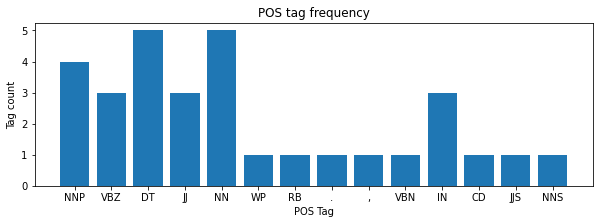

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.xlabel('POS Tag')
plt.ylabel('Tag count')
plt.title('POS tag frequency')
X=freq_dict.keys()
Y=freq_dict.values()
plt.bar(X,Y)

In [ ]:
## To know what each tagging means download tagsets first and pass the desired tag as argument to the below function.
## if passed none then entire tag set is explained
nltk.download('tagsets')
nltk.help.upenn_tagset('DT') ## will explain only JJS,if left blank then entire tag set is explained.

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [ ]:
## lets also see what are the most common occuring words.
most_popular=5
collections.Counter(word_tokenize(sentence)).most_common(most_popular)

[('the', 3), ('Kohli', 2), ('is', 2), ('Virat', 1), ('an', 1)]


## Plot a Parse Tree

In [ ]:
 """
 Chunking is a process by which a shallow parsing is done on the obtained POS taggings.
 the input to chunling is the POS list that contains the word and sentences aling with the POS patterns we want to chunk.
? = 0 or 1 match of the preceding expression
* = 0 or more match of the preceding expression
+ = 1 or more match of the preceding expression  
. = specifies any single character except a new line character
"""

'\nChunking is a process by which a shallow parsing is done on the obtained POS taggings.\nthe input to chunling is the POS list that contains the word and sentences aling with the POS patterns we want to chunk.\n? = 0 or 1 match of the preceding expression\n* = 0 or more match of the preceding expression\n+ = 1 or more match of the preceding expression  \n. = specifies any single character except a new line character\n'

In [ ]:
from nltk import RegexpParser ## import this REgex parser
pattern = 'NP: {<DT>?<JJ>*<NN>}' ## here the pattern to be chunked is DT,JJ and NN so only these would be considered to be chunked
NPChunker =  RegexpParser(pattern)# Regex Parse using the pattern
result_ch = NPChunker.parse(sent)
#result.draw()

In [ ]:
print(result_ch)

(S
  Virat/NNP
  Kohli/NNP
  is/VBZ
  (NP an/DT Indian/JJ cricketer/NN)
  who/WP
  currently/RB
  captains/VBZ
  the/DT
  India/NNP
  (NP national/JJ team/NN)
  ./.
  (NP A/DT right-handed/JJ top-order/NN)
  (NP batsman/NN)
  ,/,
  Kohli/NNP
  is/VBZ
  regarded/VBN
  as/IN
  one/CD
  of/IN
  the/DT
  best/JJS
  batsmen/NNS
  in/IN
  (NP the/DT world/NN))


## POS Tags

In [ ]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(result_ch)
pprint(iob_tagged)

[('Virat', 'NNP', 'O'),
 ('Kohli', 'NNP', 'O'),
 ('is', 'VBZ', 'O'),
 ('an', 'DT', 'B-NP'),
 ('Indian', 'JJ', 'I-NP'),
 ('cricketer', 'NN', 'I-NP'),
 ('who', 'WP', 'O'),
 ('currently', 'RB', 'O'),
 ('captains', 'VBZ', 'O'),
 ('the', 'DT', 'O'),
 ('India', 'NNP', 'O'),
 ('national', 'JJ', 'B-NP'),
 ('team', 'NN', 'I-NP'),
 ('.', '.', 'O'),
 ('A', 'DT', 'B-NP'),
 ('right-handed', 'JJ', 'I-NP'),
 ('top-order', 'NN', 'I-NP'),
 ('batsman', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('Kohli', 'NNP', 'O'),
 ('is', 'VBZ', 'O'),
 ('regarded', 'VBN', 'O'),
 ('as', 'IN', 'O'),
 ('one', 'CD', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('best', 'JJS', 'O'),
 ('batsmen', 'NNS', 'O'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('world', 'NN', 'I-NP')]


**This is how Information is extracted using heuristics based techniques. Try using another pattern.**

In [ ]:
pattern2 = 'NP2: {<VBZ>?<NNP>*<RB>}' ##
NPChunker2 =  RegexpParser(pattern2)# Regex Parse using the pattern
result_ch2 = NPChunker2.parse(sent)
print(result_ch2)

(S
  Virat/NNP
  Kohli/NNP
  is/VBZ
  an/DT
  Indian/JJ
  cricketer/NN
  who/WP
  (NP2 currently/RB)
  captains/VBZ
  the/DT
  India/NNP
  national/JJ
  team/NN
  ./.
  A/DT
  right-handed/JJ
  top-order/NN
  batsman/NN
  ,/,
  Kohli/NNP
  is/VBZ
  regarded/VBN
  as/IN
  one/CD
  of/IN
  the/DT
  best/JJS
  batsmen/NNS
  in/IN
  the/DT
  world/NN)
